<a href="https://colab.research.google.com/github/SamwelJane/Mchezopesa-Ltd-Football-analysis/blob/master/Moringa_Data_Science_Core_W6_Independent_Project_2019_08_Samwel_Jane_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. DEFINING THE QUESTION

##  a. SPECIFYING THE QUESTION:
### Make Prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank ing).

## b. METRIC FOR SUCCESS

## c. CONTEXT

A more detailed explanation and history of the rankings is available here: https://en.wikipedia.org/wiki/FIFA_World_Rankings (Links to an external site.)

An explanation of the ranking procedure is available here: https://www.fifa.com/fifa-world-ranking/procedure/men.html



## d. EXPERIMENTAL DESIGNS

## e.DATA RELEVANCE

# 2.  Data Understanding

In [0]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression


In [81]:
# loading the dataset and previewing our dataset
#url= "https://drive.google.com/open?id=1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc"
# review the first 5 rows
results=pd.read_csv('results.csv')
results.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [82]:
# define aour dataframe as rank 
# preview the fisrt 5 row in a oiur dataset
rank = pd.read_csv('fifa_ranking.csv')
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [0]:
# explore  information about our  dataframe:ranking and results
print('Results Information:',results.info())

print('Rank Information:',rank.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
date          40839 non-null object
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB
Results Information: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non

In [0]:
rank.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [0]:
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [0]:
# creating a new data frame for ranking called rank_df whcich has variables that i think might be important for this analysis
rank_df = rank[['rank','country_full','total_points','previous_points','rank_date']]
rank_df.head()

,rank,country_full,total_points,previous_points,rank_date
0,1,Germany,0.0,57,1993-08-08
1,2,Italy,0.0,57,1993-08-08
2,3,Switzerland,0.0,50,1993-08-08
3,4,Sweden,0.0,55,1993-08-08
4,5,Argentina,0.0,51,1993-08-08


In [0]:
#results.columns

In [0]:
# new data dataframe for results  will be called results_df
results_df = results[['date', 'home_team', 'away_team', 'home_score', 'away_score','tournament', 'country', 'neutral']]
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False


In [0]:
# merging dataframes to formone dataframe called df

df=results_df.merge( rank_df, left_on='country', right_on='country_full')
df.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,rank,country_full,total_points,previous_points,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False,30,Scotland,0.0,43,1993-08-08
1,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False,28,Scotland,0.0,41,1993-09-23
2,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False,29,Scotland,0.0,43,1993-10-22
3,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False,25,Scotland,0.0,43,1993-11-19
4,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False,24,Scotland,0.0,45,1993-12-23


TypeError: ignored

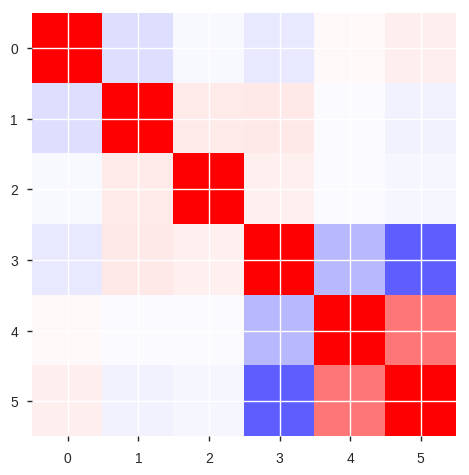

In [0]:
# running a pandas report
# preview more info about the the dataset resport
# synthetic is  used in filling fake date
import pandas_profiling


pandas_profiling.ProfileReport(df)

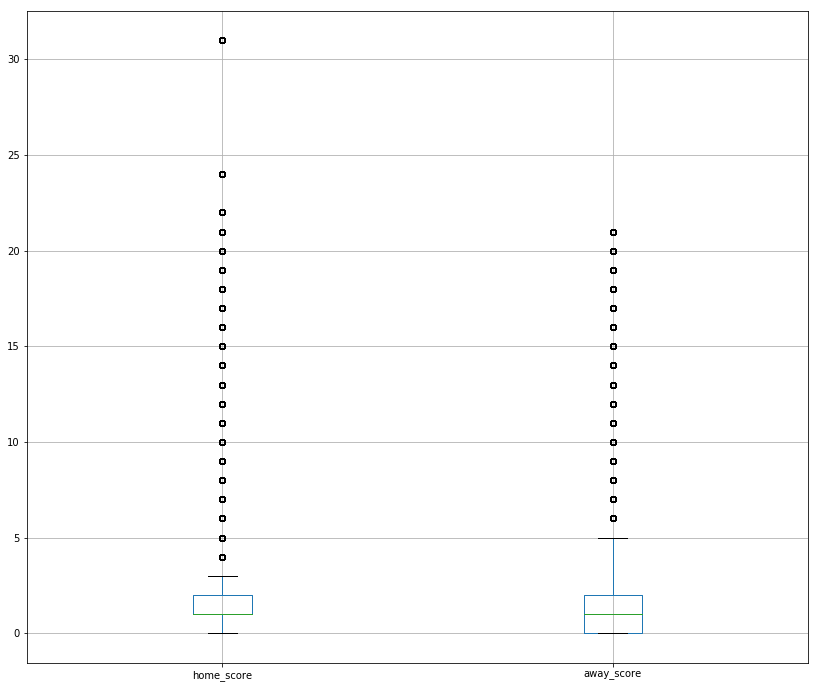

In [0]:
# checking for Outliers

column=['home_score','away_score']
plt.subplots(figsize=(14,12))
df.boxplot(column)
plt.title=('Outliers for home score and away score')
plt.show()
#Both Home score and away score  have outliers which rangaes between  4 - 32 in home score and 6-22 in away score 

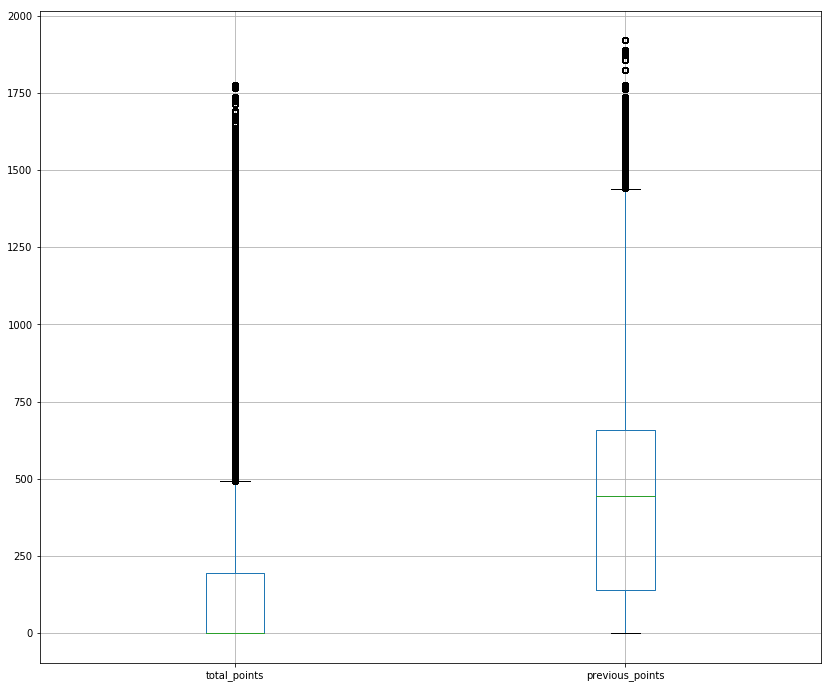

In [0]:
column=['total_points','previous_points']
plt.subplots(figsize=(14,12))
df.boxplot(column)
#Total point  column has more outliers than  previous points

In [0]:
df.describe()

,home_score,away_score,rank,total_points,previous_points
count,1.024651e+07,1.024651e+07,1.024651e+07,1.024651e+07,1.024651e+07
mean,1.734292e+00,1.179052e+00,6.916505e+01,1.723781e+02,4.595844e+02
std,1.733112e+00,1.381282e+00,5.084864e+01,3.363458e+02,3.535447e+02
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,0.000000e+00,2.500000e+01,0.000000e+00,1.400000e+02
50%,1.000000e+00,1.000000e+00,6.100000e+01,0.000000e+00,4.430000e+02
75%,2.000000e+00,2.000000e+00,1.050000e+02,1.966300e+02,6.590000e+02
max,3.100000e+01,2.100000e+01,2.090000e+02,1.775030e+03,1.920000e+03


# Bivariate Analysis

In [0]:
# The code group county team based on the Total points and how many away score the scored
df.groupby(['country_full','total_points','away_score']).max()
df.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,rank,country_full,total_points,previous_points,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False,30,Scotland,0.0,43,1993-08-08
1,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False,28,Scotland,0.0,41,1993-09-23
2,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False,29,Scotland,0.0,43,1993-10-22
3,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False,25,Scotland,0.0,43,1993-11-19
4,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False,24,Scotland,0.0,45,1993-12-23


In [0]:
# the code shows last year's ranking based on 
df[['rank_date','country_full','total_points']].sort_values('rank_date',ascending=False).head(10)


,rank_date,country_full,total_points
10246509,2018-06-07,Myanmar,205.52
731873,2018-06-07,Austria,844.70
9427508,2018-06-07,United Arab Emirates,417.66
3264689,2018-06-07,Guatemala,179.79
6468514,2018-06-07,Cambodia,103.20
732159,2018-06-07,Austria,844.70
3264975,2018-06-07,Guatemala,179.79
6468252,2018-06-07,Cambodia,103.20
9427794,2018-06-07,United Arab Emirates,417.66
3265261,2018-06-07,Guatemala,179.79


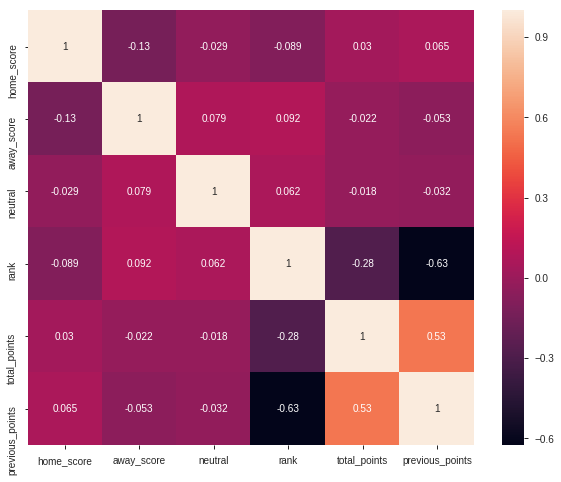

In [0]:
# Ploting the bivariate summaries and recording our observations
#

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
          annot = True)

In [0]:
#df.head(['total_points']).sum()
#df=df.sort_values(by='total_points',ascending =False).plot(kind='bar',figure=(18,9));

In [0]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,rank,country_full,total_points,previous_points,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False,30,Scotland,0.0,43,1993-08-08
1,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False,28,Scotland,0.0,41,1993-09-23
2,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False,29,Scotland,0.0,43,1993-10-22
3,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False,25,Scotland,0.0,43,1993-11-19
4,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False,24,Scotland,0.0,45,1993-12-23


# Approach 1: Polynomial Regression

In [0]:

X = df.rank.values
y = df.away_score.values

#Get the 2 and the last column from the dataset 
#X = df.iloc[:, 0:9,11:12].values
#y = df.iloc[:, 10].values
#print(X)
#print(y)

AttributeError: ignored

ValueError: ignored

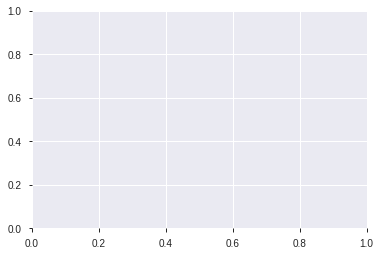

In [0]:
# Since our datasets have been joined and are pretty clean, let's start by visualizing our dataset by plotting a scatter plot

plt.scatter(X, y, color='blue') 
plt.title('Salary')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()